#### Sinjini Ghosh

#### Aim: To create a decision tree classifier and visualize it graphically

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv", index_col = 'Id')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
# To check if our dataset has missing values 

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Univariate Analysis

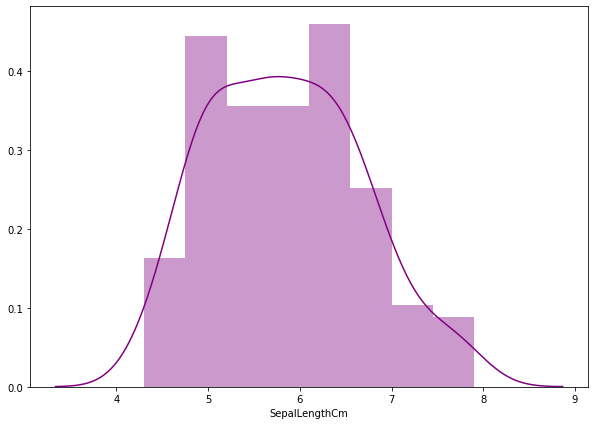

In [6]:
plt.figure(figsize = (10, 7))
sns.distplot(df.SepalLengthCm, color = "purple")
plt.show()

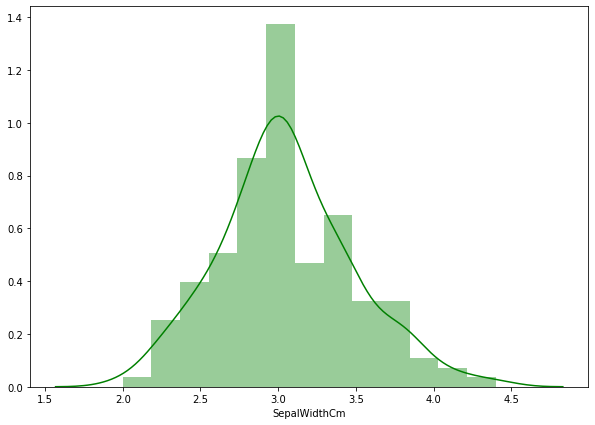

In [7]:
plt.figure(figsize = (10, 7))
sns.distplot(df.SepalWidthCm, color = "green")
plt.show()

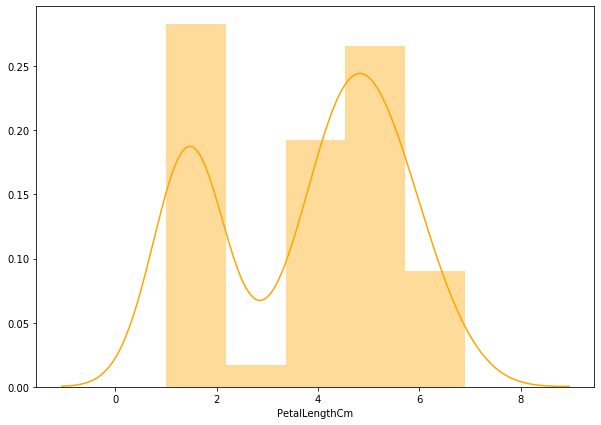

In [8]:
plt.figure(figsize = (10, 7))
sns.distplot(df.PetalLengthCm, color = "orange")
plt.show()

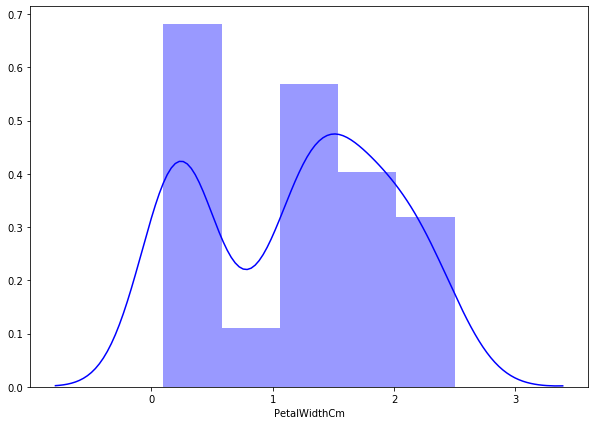

In [9]:
plt.figure(figsize = (10, 7))
sns.distplot(df.PetalWidthCm, color = "blue")
plt.show()

### Bivariate Analysis

In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


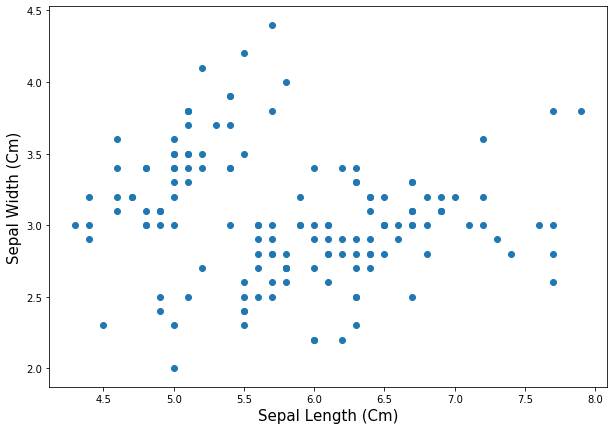

In [11]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.SepalWidthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Sepal Width (Cm)", fontsize=15)
plt.show()

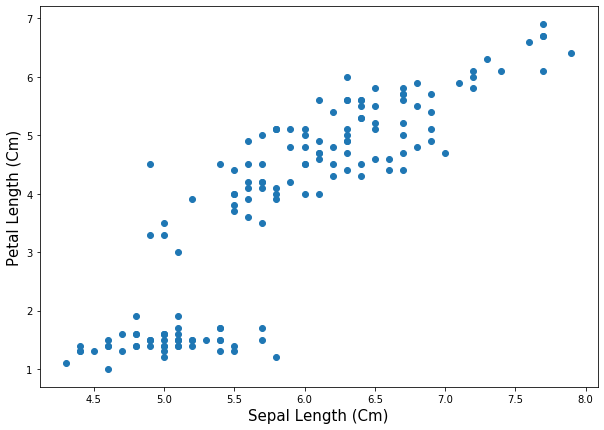

In [12]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.PetalLengthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Petal Length (Cm)", fontsize=15)
plt.show()

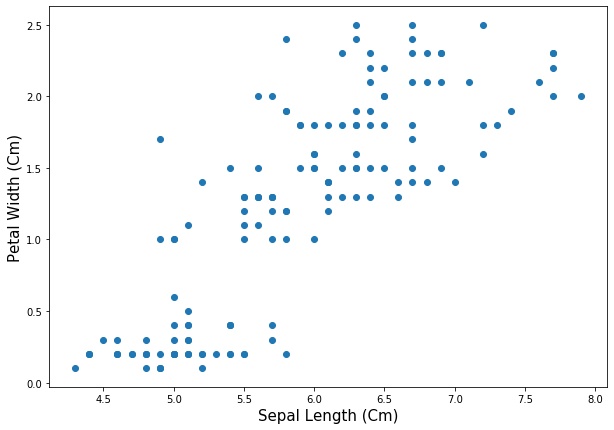

In [13]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalLengthCm, df.PetalWidthCm)
plt.xlabel("Sepal Length (Cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

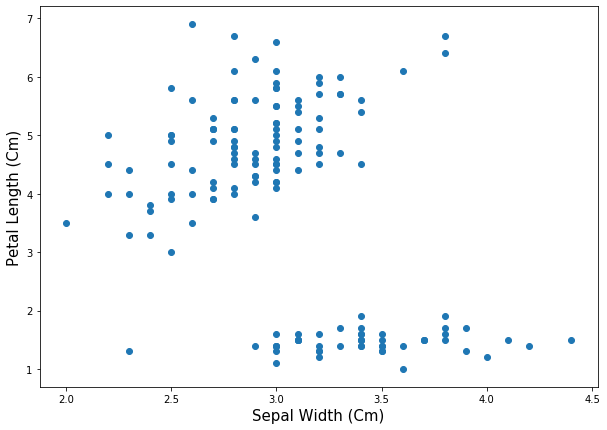

In [14]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalWidthCm, df.PetalLengthCm)
plt.xlabel("Sepal Width (Cm)", fontsize=15)
plt.ylabel("Petal Length (Cm)", fontsize=15)
plt.show()

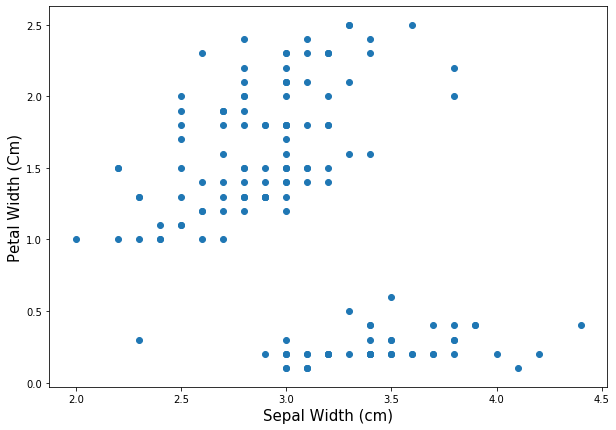

In [15]:
plt.figure(figsize = (10, 7))
plt.scatter(df.SepalWidthCm, df.PetalWidthCm)
plt.xlabel("Sepal Width (cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

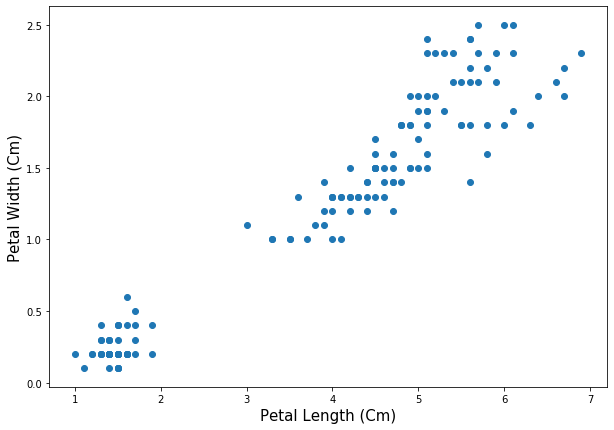

In [16]:
plt.figure(figsize = (10, 7))
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)
plt.xlabel("Petal Length (Cm)", fontsize=15)
plt.ylabel("Petal Width (Cm)", fontsize=15)
plt.show()

### Decision Tree Model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['Species'], axis=1)
y = df['Species']

# Separating the target variable and the features

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Hyperparameter tuning

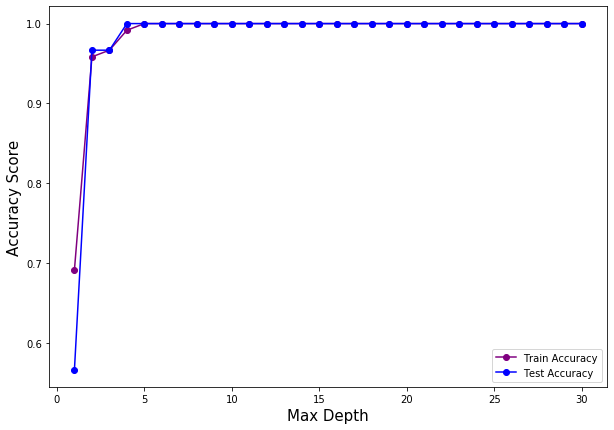

    Max Depth  Train Accuracy  Test Accuracy
0           1        0.691667       0.566667
1           2        0.958333       0.966667
2           3        0.966667       0.966667
3           4        0.991667       1.000000
4           5        1.000000       1.000000
5           6        1.000000       1.000000
6           7        1.000000       1.000000
7           8        1.000000       1.000000
8           9        1.000000       1.000000
9          10        1.000000       1.000000
10         11        1.000000       1.000000
11         12        1.000000       1.000000
12         13        1.000000       1.000000
13         14        1.000000       1.000000
14         15        1.000000       1.000000
15         16        1.000000       1.000000
16         17        1.000000       1.000000
17         18        1.000000       1.000000
18         19        1.000000       1.000000
19         20        1.000000       1.000000
20         21        1.000000       1.000000
21        

In [21]:
# max_depth
# The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data

train_accuracy_maxdepth = []
test_accuracy_maxdepth = []

for i in range(1, 31):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(x_train, y_train)
    y_preds_train = clf.predict(x_train)
    train_accuracy_maxdepth.append(accuracy_score(y_preds_train, y_train))
    y_preds_test = clf.predict(x_test)
    test_accuracy_maxdepth.append(accuracy_score(y_preds_test, y_test))

max_depth_accuracy = pd.DataFrame({"Max Depth":range(1, 31), "Train Accuracy": train_accuracy_maxdepth, "Test Accuracy": test_accuracy_maxdepth})

plt.figure(figsize=(10, 7))
plt.plot(max_depth_accuracy['Max Depth'], max_depth_accuracy['Train Accuracy'], color="purple", marker="o", label = "Train Accuracy")
plt.plot(max_depth_accuracy['Max Depth'], max_depth_accuracy['Test Accuracy'], color = "blue", marker="o", label = "Test Accuracy")
plt.xlabel("Max Depth", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.legend()
plt.show()

print(max_depth_accuracy)

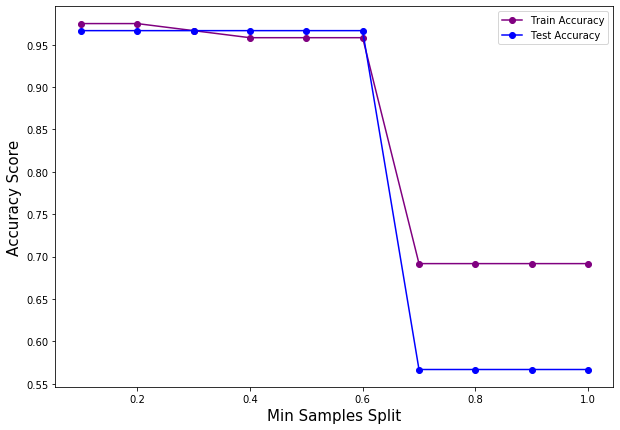

   Min Samples Split  Train Accuracy  Test Accuracy
0                0.1        0.975000       0.966667
1                0.2        0.975000       0.966667
2                0.3        0.966667       0.966667
3                0.4        0.958333       0.966667
4                0.5        0.958333       0.966667
5                0.6        0.958333       0.966667
6                0.7        0.691667       0.566667
7                0.8        0.691667       0.566667
8                0.9        0.691667       0.566667
9                1.0        0.691667       0.566667


In [22]:
# min_samples_split: min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

train_accuracy_minsamplessplit = []
test_accuracy_minsamplessplit = []
range_min_samples_split = np.linspace(0.1, 1, 10, endpoint = True)


for i in range_min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split = i)
    clf.fit(x_train, y_train)
    y_preds_train = clf.predict(x_train)
    train_accuracy_minsamplessplit.append(accuracy_score(y_preds_train, y_train))
    y_preds_test = clf.predict(x_test)
    test_accuracy_minsamplessplit.append(accuracy_score(y_preds_test, y_test))
    
min_samples_split_accuracy = pd.DataFrame({"Min Samples Split":range_min_samples_split, "Train Accuracy": train_accuracy_minsamplessplit, "Test Accuracy": test_accuracy_minsamplessplit})


plt.figure(figsize=(10, 7))
plt.plot(min_samples_split_accuracy['Min Samples Split'], min_samples_split_accuracy['Train Accuracy'], color="purple", marker="o", label = "Train Accuracy")
plt.plot(min_samples_split_accuracy['Min Samples Split'], min_samples_split_accuracy['Test Accuracy'], color = "blue", marker="o", label = "Test Accuracy")
plt.xlabel("Min Samples Split", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.legend()
plt.show()


print(min_samples_split_accuracy)


    

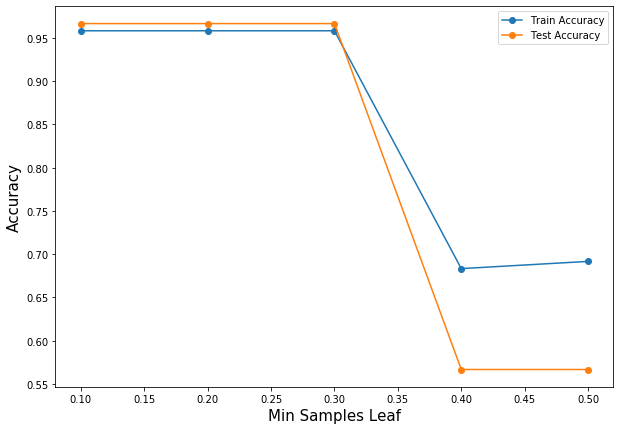

   Min Samples Leaf  Train Accuracy  Test Accuracy
0               0.1        0.958333       0.966667
1               0.2        0.958333       0.966667
2               0.3        0.958333       0.966667
3               0.4        0.683333       0.566667
4               0.5        0.691667       0.566667


In [23]:
# min_samples_leaf: min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

train_accuracy_minsamplesleaf = []
test_accuracy_minsamplesleaf = []
range_minsamplesleaf = np.linspace(0.1, 0.5, 5, endpoint = True)

for i in range_minsamplesleaf:
    clf = DecisionTreeClassifier(min_samples_leaf = i)
    clf.fit(x_train, y_train)
    y_preds_train = clf.predict(x_train)
    train_accuracy_minsamplesleaf.append(accuracy_score(y_preds_train, y_train))
    y_preds_test = clf.predict(x_test)
    test_accuracy_minsamplesleaf.append(accuracy_score(y_preds_test, y_test))
    
min_samples_leaf_accuracy = pd.DataFrame({"Min Samples Leaf": range_minsamplesleaf, "Train Accuracy": train_accuracy_minsamplesleaf, "Test Accuracy": test_accuracy_minsamplesleaf})

plt.figure(figsize = (10, 7))
plt.plot(min_samples_leaf_accuracy['Min Samples Leaf'], min_samples_leaf_accuracy['Train Accuracy'], label = "Train Accuracy", marker = "o")
plt.plot(min_samples_leaf_accuracy['Min Samples Leaf'], min_samples_leaf_accuracy['Test Accuracy'], label = "Test Accuracy", marker = "o")
plt.xlabel("Min Samples Leaf", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend()
plt.show()

print(min_samples_leaf_accuracy)



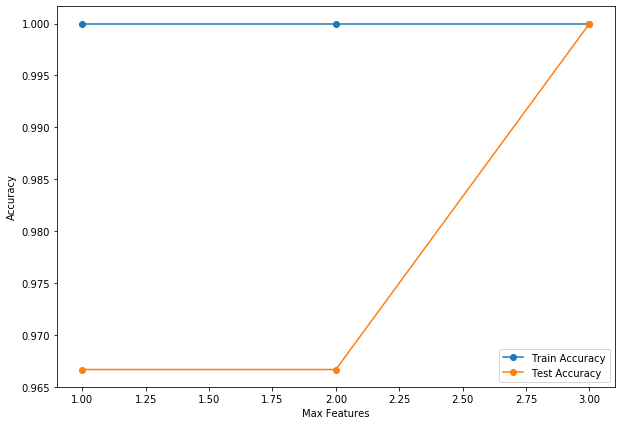

   Max Features  Train Accuracy  Test Accuracy
0             1             1.0       0.966667
1             2             1.0       0.966667
2             3             1.0       1.000000


In [24]:
# max_features: max_features represents the number of features to consider when looking for the best split.

range_maxfeatures = list(range(1, x_train.shape[1]))

train_accuracy_maxfeatures = []
test_accuracy_maxfeatures = []

for i in range_maxfeatures:
    clf = DecisionTreeClassifier(max_features = i)
    clf.fit(x_train, y_train)
    y_train_predict = clf.predict(x_train)
    train_accuracy_maxfeatures.append(accuracy_score(y_train_predict, y_train))
    y_test_predict = clf.predict(x_test)
    test_accuracy_maxfeatures.append(accuracy_score(y_test_predict, y_test))
    
range_maxfeatures_accuracy = pd.DataFrame({"Max Features": range_maxfeatures, "Train Accuracy": train_accuracy_maxfeatures, "Test Accuracy": test_accuracy_maxfeatures})

plt.figure(figsize=(10, 7))
plt.plot(range_maxfeatures_accuracy['Max Features'], range_maxfeatures_accuracy['Train Accuracy'], marker = "o", label = "Train Accuracy")
plt.plot(range_maxfeatures_accuracy['Max Features'], range_maxfeatures_accuracy['Test Accuracy'], marker = "o", label = "Test Accuracy")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


print(range_maxfeatures_accuracy)

In [25]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
y_preds = model.predict(x_test)
accuracy_score(y_preds, y_test)

0.9666666666666667

### Visualizing the decision tree

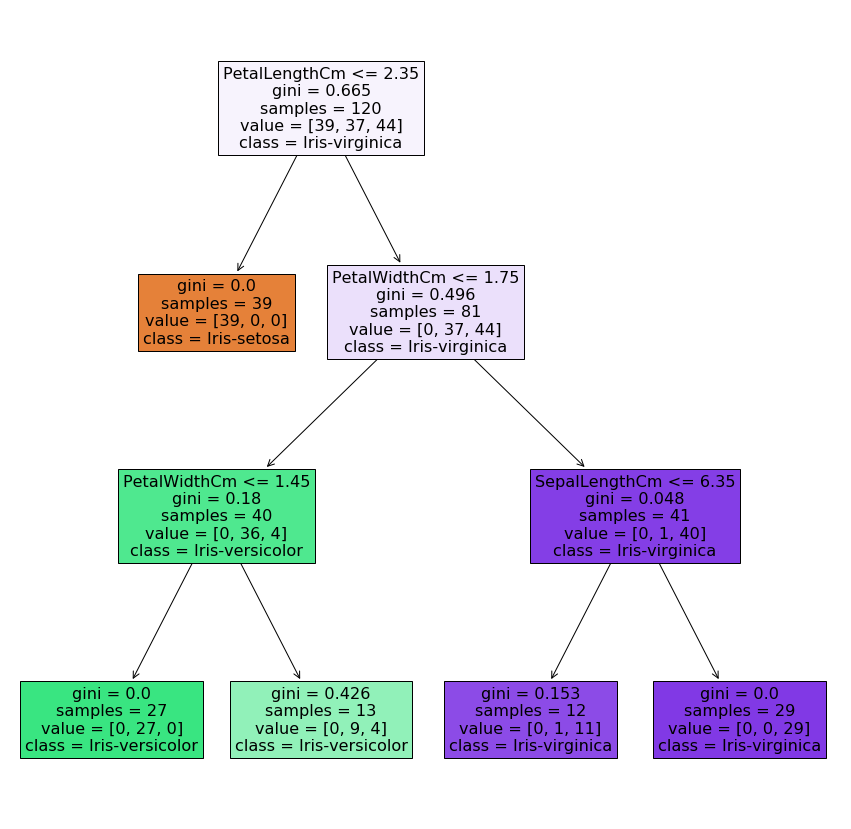

In [30]:
from sklearn import tree

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plt.figure(figsize = (15, 15))
tree.plot_tree(model, feature_names = features, class_names = classes, filled=True)
plt.show()